### Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [97]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [98]:
#import the dataset
data= pd.read_html(r'https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv')
data= data[0]
data

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,NaN,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,NaN,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,NaN,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,NaN,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,NaN,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,NaN,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,NaN,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


0    549
1    342
Name: Survived, dtype: int64


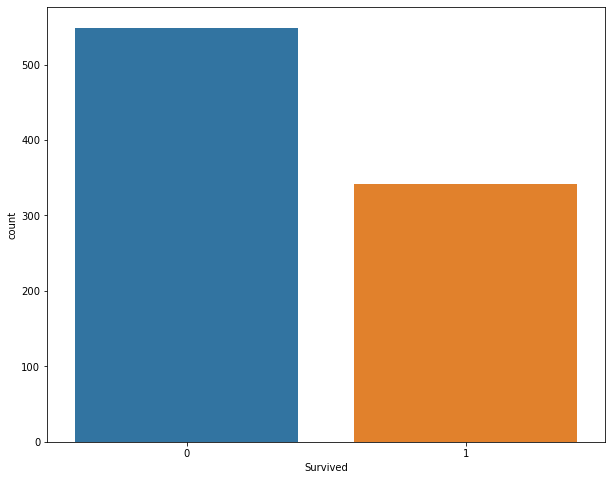

In [99]:
#seeing whether the target variable is imbalanced or not
print(data.Survived.value_counts())
plt.figure(figsize=(10,8),facecolor='white')
sns.countplot(data.Survived)
plt.show()

The dataset is not imbalanced. The dataset has some unrelated variable which is filled with null values. so, removing the column- Unnamed: 0 

In [100]:
#dropping those columns
data.drop(columns=['Unnamed: 0'],inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The column has been removed from the dataset. Lets see the datatype of each column 

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Now, lets check for any null values in the rest of the column.

In [102]:
#null value
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As you can see there are null values in 3 columns:
1. Age
2. Cabin
3. Embarked

In [103]:
#separating the observations with non_null cabin observations.
Cabn= data[data.Cabin.isnull()==False]
Cabn

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [104]:
#converting the categorical data to int.
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
Cabn['Cabin']= encoder.fit_transform(Cabn['Cabin'])
#correlation with Survived.
Cabn.corrwith(Cabn.Survived)

PassengerId    0.110153
Survived       1.000000
Pclass        -0.033032
Age           -0.244604
SibSp          0.132599
Parch          0.038081
Fare           0.128306
Cabin          0.029619
dtype: float64

- Cabin has more than half of the observations as null values. Although Cabin position could affect the rate of survival,While comparing the cabin and survived with non-null values the correlation is very low thus cabin does not significantly matter. Thus dropping the Cabin column.

In [105]:
data.drop(columns='Cabin',inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


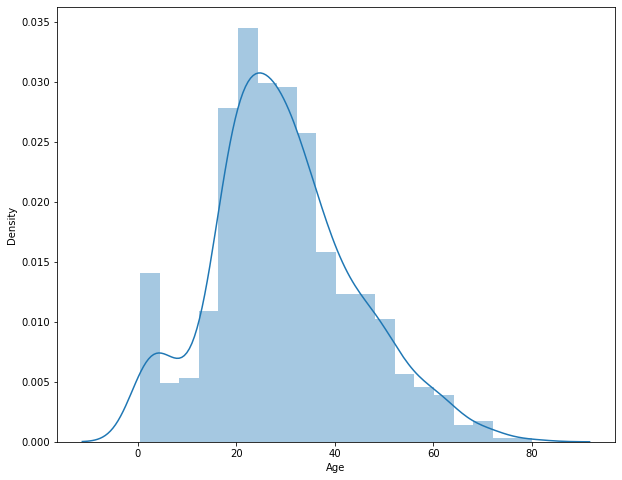

In [106]:
#distribution graph of Age variable
plt.figure(figsize=(10,8),facecolor='white')
sns.distplot(data.Age)
plt.show()

- The above graph shows that most of the age falls in the middle of the normal distribuition. Thus, Filling the null values of the age column by taking the median of it, because mean gives age with decimal point which is not practial.

In [107]:
#filling the missing values of the Age variable.
data.Age.fillna(data.Age.median(),inplace=True)

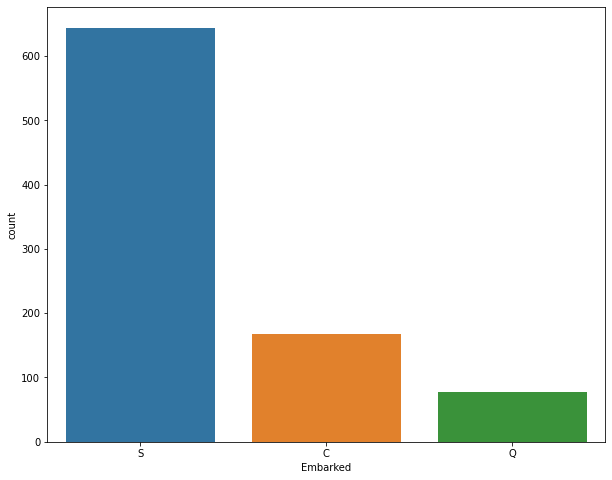

In [108]:
#value count graph for embarked variable
plt.figure(figsize=(10,8),facecolor='white')
sns.countplot(data.Embarked)
plt.show()

- From above it is clear that variable 's' occur more times than other variable. so we can assume that the missing values will also has the mostly occured variable. Thus, filling the null of embarked column with mode.

In [109]:
#filling the missing values of the Embarked variable.
mod=data['Embarked'].mode()
data['Embarked'].fillna(mod[0],inplace=True)

In [110]:
#checking the null values is still present or not
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Names, PassengerId and Ticket has nothing to do with the possibility of passenger survived or not. Thus, neglecting those columns for the dataset.

In [111]:
data.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [112]:
#visualizing nominal and numerical data
nominal= ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
ordinal=['Age','Fare']

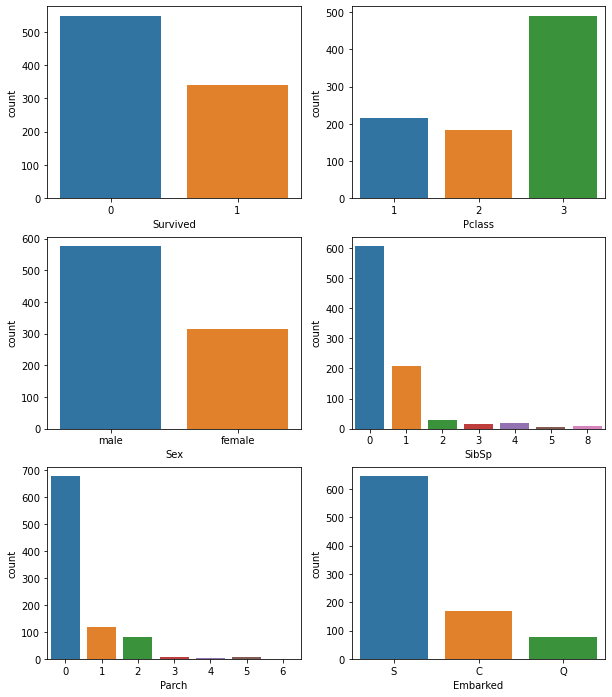

In [113]:
#classes in each nominal variables
plt.figure(figsize=(10,12),facecolor='white')
numplot=1
for column in nominal:
    plt.subplot(3,2,numplot)
    sns.countplot(data[column])
    numplot+=1
plt.show()

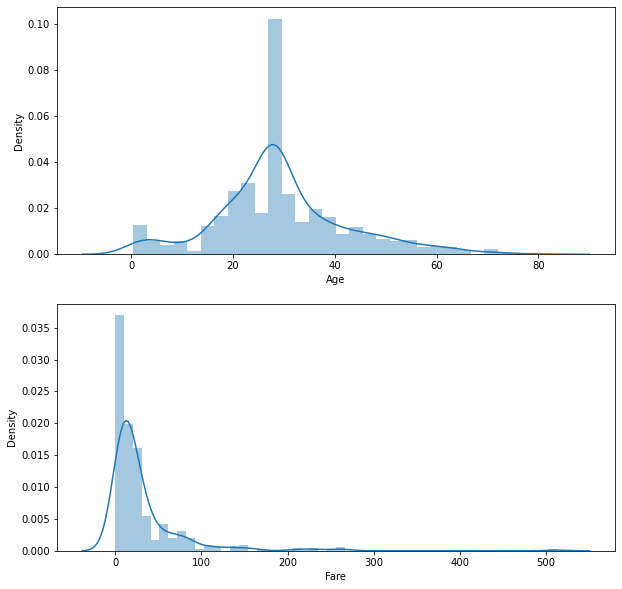

In [114]:
#distribution of numerical variables
plt.figure(figsize=(10,10),facecolor='white')
numplot=1
for column in ordinal:
    plt.subplot(2,1,numplot)
    sns.distplot(data[column])
    numplot+=1
plt.show()

In [115]:
#Encoding categorical varibles into numerical varibales
to_numerical=['Sex','Embarked']

for column in to_numerical:
    data[column]=encoder.fit_transform(data[column])

In [116]:
#correlation with target and multicollinearity between features
corr_data= data.corr()
corr_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


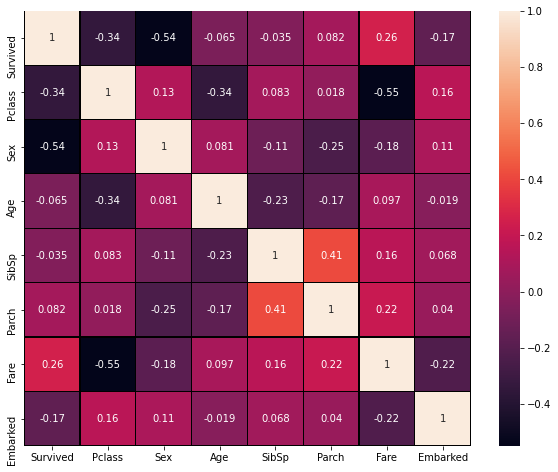

In [117]:
plt.figure(figsize=(10,8),facecolor='white')
sns.heatmap(corr_data,annot=True,linecolor='black',linewidths=0.1)
plt.show()

Parch and SibSp has the least correlation with the survived variable. Pclass has the highest correlation with the survived. There is no much of multicollineartity between the features.

In [118]:
#skewness
data.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

1. Pclass, sex, sibsp, parch, embarked are categorical data
2. Survived is a target variable.

Above variables skewness is not an issue because they are categorical and target variables.
Though Age and Fare are continuous variables. the skewness should be rectified.

In [119]:
#power transform
skw= data[['Age','Fare']]
from sklearn.preprocessing import power_transform
skw= pd.DataFrame(power_transform(skw),columns=skw.columns)
data[['Age','Fare']]=skw

In [120]:
data.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.074644
SibSp       3.695352
Parch       2.749117
Fare       -0.040329
Embarked   -1.264823
dtype: float64

Skewness of Age and Fare has been reduced. Lets see if there is any outliers in those numerical variables.

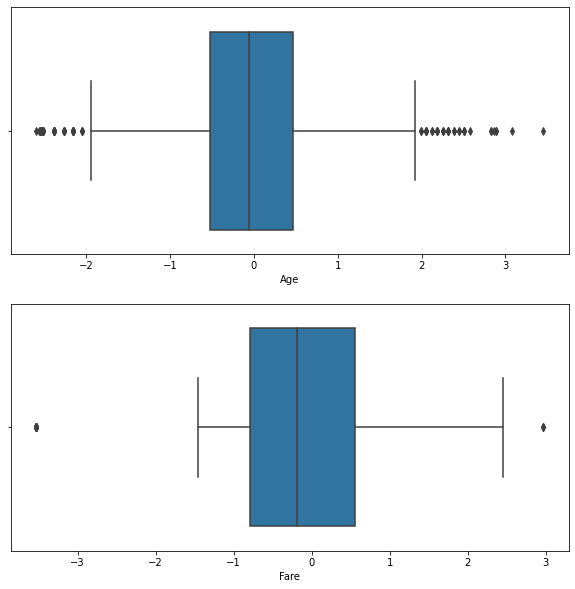

In [121]:
#outliers
plt.figure(figsize=(10,10),facecolor='white')
numplot=1
for column in ordinal:
    plt.subplot(2,1,numplot)
    sns.boxplot(data[column])
    numplot+=1
plt.show()

Outliers in Age variable are close to the min and max value and less than st 3. So, lets leave these observations. But, there are outlier which is far away from the mean we have to remove it.

In [122]:
data= data[np.abs(data['Fare'])<3]

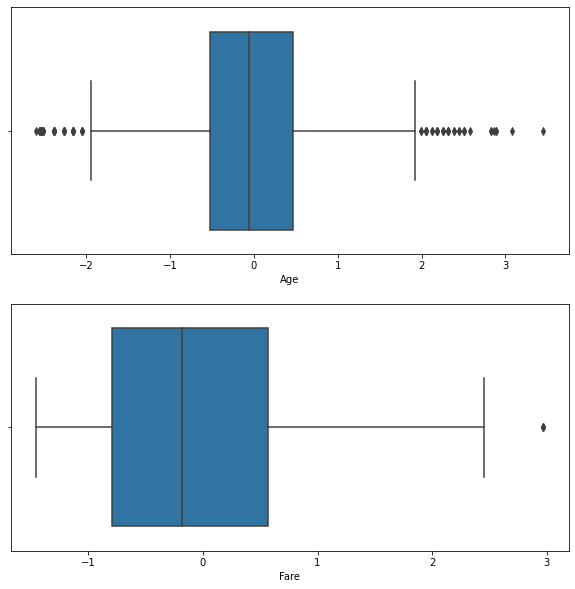

In [123]:
#again checking outliers
plt.figure(figsize=(10,10),facecolor='white')
numplot=1
for column in ordinal:
    plt.subplot(2,1,numplot)
    sns.boxplot(data[column])
    numplot+=1
plt.show()

Some of the outliers which are far from mean has been removed.

In [124]:
#model creation
#spliting the preprocessed data
x=data.drop(columns='Survived')
y= data.Survived

In [125]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x= scalar.fit_transform(x)

In [126]:

#importing necessary library for model building
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [127]:
#selecting the best random state with best score
max_score=0
trainscore=0
maxrs=0
for i in range(0,1000):
    lr= LogisticRegression()
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    train_pred= lr.predict(x_train)
    test_pred= lr.predict(x_test)
    score= accuracy_score(y_test,test_pred)
    trainscore= accuracy_score(y_train,train_pred)
    if round(score,3)==round(trainscore,3):
        print(f'At random state {i} the training accuracy is {trainscore} and test accuracy is {score}')
    

At random state 127 the training accuracy is 0.8014285714285714 and test accuracy is 0.8011363636363636
At random state 190 the training accuracy is 0.79 and test accuracy is 0.7897727272727273
At random state 426 the training accuracy is 0.8014285714285714 and test accuracy is 0.8011363636363636
At random state 459 the training accuracy is 0.8014285714285714 and test accuracy is 0.8011363636363636
At random state 901 the training accuracy is 0.8014285714285714 and test accuracy is 0.8011363636363636


In [131]:
#creating train_test split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25, random_state=459)

In [132]:
#best cross fold value
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cvs= cross_val_score(lr,x,y,cv=j)
    cvs_mean= cvs.mean()
    print(f'At cross fold {j} cross value score is {cvs_mean}')

At cross fold 2 cross value score is 0.7899543378995434
At cross fold 3 cross value score is 0.7876712328767123
At cross fold 4 cross value score is 0.7945205479452054
At cross fold 5 cross value score is 0.7876818181818181
At cross fold 6 cross value score is 0.7888127853881278
At cross fold 7 cross value score is 0.7911201814058957
At cross fold 8 cross value score is 0.7899499582985821
At cross fold 9 cross value score is 0.7865207938845642


In [133]:
#model creation (Logical Regression)
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
LR.fit(x_train,y_train)
y_pred= LR.predict(x_test)

#cross valuation
cvs= cross_val_score(LR,x,y,cv=7)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.8127853881278538
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.7911201814058957
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[120  21]
 [ 20  58]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       141
           1       0.73      0.74      0.74        78

    accuracy                           0.81       219
   macro avg       0.80      0.80      0.80       219
weighted avg       0.81      0.81      0.81       219



In [138]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)

#cross valuation
cvs= cross_val_score(rf,x,y,cv=7)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.8493150684931506
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.8128526077097505
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[124  17]
 [ 16  62]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       141
           1       0.78      0.79      0.79        78

    accuracy                           0.85       219
   macro avg       0.84      0.84      0.84       219
weighted avg       0.85      0.85      0.85       219



In [139]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred= dt.predict(x_test)

#cross valuation
cvs= cross_val_score(dt,x,y,cv=7)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.7899543378995434
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.7842902494331065
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[117  24]
 [ 22  56]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       141
           1       0.70      0.72      0.71        78

    accuracy                           0.79       219
   macro avg       0.77      0.77      0.77       219
weighted avg       0.79      0.79      0.79       219



In [140]:
#Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb= GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred= gb.predict(x_test)

#cross valuation
cvs= cross_val_score(gb,x,y,cv=7)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.8356164383561644
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.8265124716553288
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[128  13]
 [ 23  55]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       141
           1       0.81      0.71      0.75        78

    accuracy                           0.84       219
   macro avg       0.83      0.81      0.82       219
weighted avg       0.83      0.84      0.83       219



In [141]:
#support vector classifier
from sklearn.svm import SVC

svc= SVC()
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)

#cross valuation
cvs= cross_val_score(svc,x,y,cv=7)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.8356164383561644
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.818530612244898
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[133   8]
 [ 28  50]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       141
           1       0.86      0.64      0.74        78

    accuracy                           0.84       219
   macro avg       0.84      0.79      0.81       219
weighted avg       0.84      0.84      0.83       219



<Figure size 720x720 with 0 Axes>

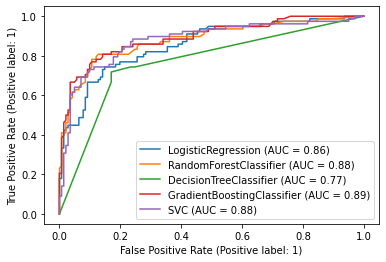

In [142]:
#plotting Roc curve anb finding the best model
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(10,10),facecolor='white')
chart= plot_roc_curve(LR,x_test,y_test)
plot_roc_curve(rf,x_test,y_test,ax=chart.ax_)
plot_roc_curve(dt,x_test,y_test,ax=chart.ax_)
plot_roc_curve(gb,x_test,y_test,ax=chart.ax_)
plot_roc_curve(svc,x_test,y_test,ax=chart.ax_)
plt.show()

We will do hyperparameter tuning for the Gradient Boosting Classifier because it has the highest area under the curve when compared with the other model.

In [149]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingClassifier()
param = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100],
    "min_samples_split": np.linspace(0.1, 1.0, 10, endpoint=True),
    "min_samples_leaf": np.linspace(0.1, 0.5, 5, endpoint=True)
}

grp= GridSearchCV(gb,param_grid=param)
grp.fit(x_train,y_train)
print(grp.best_params_)

#model
gb= grp.best_estimator_ 
gb.fit(x_train,y_train)

#predict
y_pred= gb.predict(x_test)

#accuracy score
print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 500}
Accuracy 0.8538812785388128
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[127  14]
 [ 18  60]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       141
           1       0.81      0.77      0.79        78

    accuracy                           0.85       219
   macro avg       0.84      0.83      0.84       219
weighted avg       0.85      0.85      0.85       219



**The Model gives accuracy score of 85%, which is good improvement.**

In [151]:
#saving our trained model
import pickle
pickle.dump(gb,open('Titanic_pred.pkl','wb'))